In [1]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

In [2]:
iris = pd.read_csv('Iris.csv')
iris.drop(['Id'], axis = 1, inplace = True)
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
trainX, testX, trainY, testY = train_test_split(iris.drop(['Species'], axis =1), iris.Species, test_size= 0.25, 
                                                stratify = iris['Species'])

In [4]:
parameters_test = {
    'C':[0.1, 0.5, 1.0, 5.0, 10.0],
    'kernel':['linear','poly','rbf','sigmoid']
}

In [5]:
classificator = SVC()
grid = GridSearchCV(classificator, parameters_test, scoring= 'accuracy', n_jobs=-1)

In [6]:
grid.fit(trainX, trainY)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': [0.1, 0.5, 1.0, 5.0, 10.0], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [7]:
print(pd.DataFrame(grid.cv_results_))

    mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0        0.003324  4.696845e-04         0.001330    4.708084e-04     0.1   
1        0.003989  0.000000e+00         0.000997    0.000000e+00     0.1   
2        0.003989  0.000000e+00         0.000997    0.000000e+00     0.1   
3        0.003989  0.000000e+00         0.000997    0.000000e+00     0.1   
4        0.001994  7.867412e-07         0.000333    4.704712e-04     0.5   
5        0.001330  4.700217e-04         0.000998    3.371748e-07     0.5   
6        0.001662  4.697969e-04         0.000665    4.701341e-04     0.5   
7        0.001995  2.247832e-07         0.000665    4.700779e-04     0.5   
8        0.000998  3.371748e-07         0.000998    2.973602e-07       1   
9        0.001662  4.705275e-04         0.000665    4.699093e-04       1   
10       0.001330  4.702465e-04         0.000665    4.701341e-04       1   
11       0.001330  4.700217e-04         0.000997    1.123916e-07       1   
12       0.0

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\util

In [8]:
grid.best_params_

{'C': 0.5, 'kernel': 'linear'}

In [9]:
classificator = SVC(C = 0.1, kernel='linear')
classificator.fit(trainX, trainY)
predict = classificator.predict(testX)
print(confusion_matrix(testY, predict))
print(classification_report(testY, predict))

[[12  0  0]
 [ 0 12  1]
 [ 0  1 12]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.92      0.92      0.92        13
 Iris-virginica       0.92      0.92      0.92        13

      micro avg       0.95      0.95      0.95        38
      macro avg       0.95      0.95      0.95        38
   weighted avg       0.95      0.95      0.95        38



In [10]:
classificator.support_vectors_

array([[5.1, 3.8, 1.9, 0.4],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [6.8, 2.8, 4.8, 1.4],
       [6.7, 3. , 5. , 1.7],
       [6.7, 3.1, 4.4, 1.4],
       [5.5, 2.6, 4.4, 1.2],
       [5.5, 2.4, 3.8, 1.1],
       [6.4, 3.2, 4.5, 1.5],
       [5.7, 2.8, 4.5, 1.3],
       [5.6, 3. , 4.5, 1.5],
       [6. , 3.4, 4.5, 1.6],
       [6.5, 2.8, 4.6, 1.5],
       [4.9, 2.4, 3.3, 1. ],
       [5.9, 3. , 4.2, 1.5],
       [5.7, 2.6, 3.5, 1. ],
       [6.7, 3.1, 4.7, 1.5],
       [6.6, 3. , 4.4, 1.4],
       [6.3, 2.5, 4.9, 1.5],
       [6.1, 3. , 4.6, 1.4],
       [5.2, 2.7, 3.9, 1.4],
       [6.1, 2.9, 4.7, 1.4],
       [6. , 2.9, 4.5, 1.5],
       [6.3, 3.3, 4.7, 1.6],
       [7. , 3.2, 4.7, 1.4],
       [5.4, 3. , 4.5, 1.5],
       [6.3, 2.3, 4.4, 1.3],
       [5.9, 3.2, 4.8, 1.8],
       [6.1, 2.6, 5.6, 1.4],
       [6.3, 2.9, 5.6, 1.8],
       [6.1, 3. , 4.9, 1.8],
       [6.4, 3.2, 5.3, 2.3],
       [5.8, 2.8, 5.1, 2.4],
       [6.9, 3

In [11]:
classificator.coef_

array([[-0.13377305,  0.33377305, -0.64669506, -0.27131916],
       [-0.15374564,  0.11058829, -0.48023885, -0.22071243],
       [-0.05323127,  0.20070823, -1.14803009, -0.93947493]])

In [12]:
classificator.intercept_

array([1.69638998, 2.34595062, 6.94317417])

In [13]:
trainX, testX, trainY, testY = train_test_split(iris.drop(['Species', 'SepalWidthCm', 'SepalLengthCm'], axis =1), iris.Species, test_size= 0.25, 
                                                stratify = iris['Species'])

In [14]:
classificator = SVC(C = 10, kernel='rbf')
classificator.fit(trainX, trainY)
predict = classificator.predict(testX)
print(confusion_matrix(testY, predict))
print(classification_report(testY, predict))

[[12  0  0]
 [ 0 13  0]
 [ 0  3 10]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.81      1.00      0.90        13
 Iris-virginica       1.00      0.77      0.87        13

      micro avg       0.92      0.92      0.92        38
      macro avg       0.94      0.92      0.92        38
   weighted avg       0.94      0.92      0.92        38



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [15]:
from mlxtend.plotting import plot_decision_regions
from sklearn.preprocessing import LabelEncoder

In [16]:
le = LabelEncoder()
trainNumY = le.fit_transform(trainY.values)

In [17]:
classificator = SVC(C = 10, kernel='linear')
classificator.fit(trainX, trainNumY)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [18]:
trainNumY

array([1, 1, 0, 1, 0, 2, 0, 0, 0, 2, 1, 2, 2, 1, 2, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 2, 2, 0, 1, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 1, 0, 1, 0, 2,
       1, 1, 0, 1, 1, 2, 0, 2, 0, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 2, 2, 1, 2, 2, 2, 0, 0, 0, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 2, 0, 0, 2, 2, 1, 2, 1, 0, 0, 1, 0, 1, 2, 1, 2, 2, 1, 1, 1,
       1, 2])

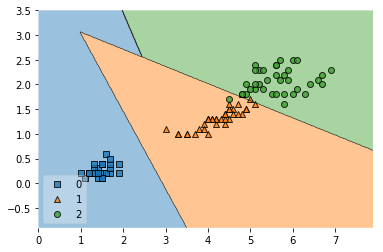

In [19]:
plot_decision_regions(X=trainX.values, 
                      y=trainNumY,
                      clf=classificator,
                      legend=3
                      )

In [20]:
print('0 is %s' % le.inverse_transform([0])[0])
print('1 is %s' % le.inverse_transform([1])[0])
print('2 is %s' % le.inverse_transform([2])[0])

0 is Iris-setosa
1 is Iris-versicolor
2 is Iris-virginica


In [21]:
XC = iris.drop(['Species'], axis = 1) #X completo
XP = iris.drop(['SepalLengthCm', 'SepalWidthCm', 'Species'], axis=1) #X Parcial
Y = iris['Species']

In [22]:
from sklearn.model_selection import cross_val_score

In [23]:
SVM = SVC(C = 0.1, kernel='linear')
score = cross_val_score(SVM, XC, Y, cv=5)
print(score)

[0.96666667 0.96666667 0.96666667 0.96666667 1.        ]


In [24]:
print('A acuracia da Iris com todos atributos tem:')
print('Média: %0.2f e Desvio Padrão de +/-: %0.2f' % (np.mean(score), np.std(score)))

A acuracia da Iris com todos atributos tem:
Média: 0.97 e Desvio Padrão de +/-: 0.01


In [25]:
SVM = SVC(C = 0.1, kernel='linear')
score = cross_val_score(SVM, XP, Y, cv=5)
print(score)

[0.96666667 0.96666667 0.93333333 0.93333333 1.        ]


In [26]:
print('A acuracia da Iris só com atributo da Petalas tem:')
print('Média: %0.2f e Desvio Padrão de +/-: %0.2f' % (np.mean(score), np.std(score)))

A acuracia da Iris só com atributo da Petalas tem:
Média: 0.96 e Desvio Padrão de +/-: 0.02
